In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading the file
breast_cancer=pd.read_csv('/Users/jayraj/Applied_AI_Course/Applied_ai_course/Datasets/breast_cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
# Dropping id and Unnamed: 32 which are unneccesry in dataset
data=breast_cancer.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
diagnosis=breast_cancer.diagnosis

In [15]:
# Data preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(569, 30)


In [16]:
# Finding the co-variance of a matrix which is A^T*A
sample_data=standardized_data

# Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T, sample_data)

print('the shape of the co variance matrix is = ', covar_matrix.shape)

the shape of the co variance matrix is =  (30, 30)


In [19]:
# Finding top two eigen values and corresponding eigen vectors for projecting onto 2-D space

from scipy.linalg import eigh

# The parameter eigvals is defined (low to high) 
# eigh function will return the eigen values in ascending order (0,1,2,3,4......782,783)
# Here this code only generates top two (782 and 783)
values, vectors=eigh(covar_matrix,eigvals=(28,29))

print('the shape of eigen vectors = ', vectors.shape)

# Converting the eigen vectors into 2D for easyness of further comparison
vectors=vectors.T

print("the shape of the updated vector= ", vectors.shape)

#vectors[0] shows the 1st eigen vector 
#vectors[1] shows the 2nd eigen vector

the shape of eigen vectors =  (30, 2)
the shape of the updated vector=  (2, 30)


In [21]:
# Projecting the original data sample on the plane formed by
# two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates =np.matmul(vectors,sample_data.T) # (2, 30) x (30, 569)

print('resultant data points" shape is ', vectors.shape, 'X', sample_data.T.shape)

resultant data points" shape is  (2, 30) X (30, 569)


In [22]:
import pandas as pd

# Appending label to the 2D projected data
new_coordinates = np.vstack((new_coordinates,diagnosis)).T

In [23]:
# Creating a new dataframe for the labelled points
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principal', '2nd_principal','diagnosis'))
print(dataframe.head())

  1st_principal 2nd_principal diagnosis
0      1.948583     -9.192837         M
1     -3.768172     -2.387802         M
2     -1.075174     -5.733896         M
3     10.275589     -7.122953         M
4     -1.948072     -3.935302         M


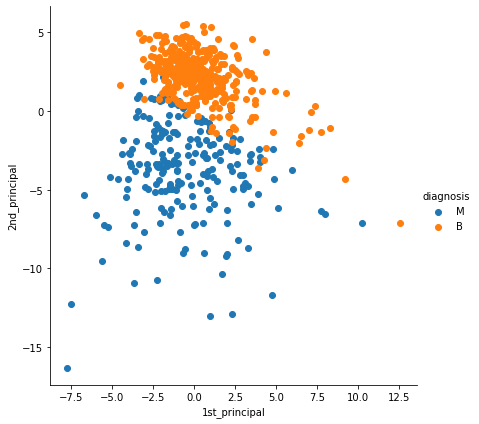

In [24]:
# Plotting the 2D data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue='diagnosis', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()